In [18]:
import matplotlib.pyplot as plt
import holoviews as hv
import hvplot
import hvplot.pandas
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import json
import time
from config import api_key
from scipy.stats import linregress
from pprint import pprint

In [19]:
artist = 'GreenDay'
locale = 'en-us'
segment = 'Music'

events = requests.get(f'https://app.ticketmaster.com/discovery/v2/events.json?keyword={artist}&segment={segment}&apikey={api_key}').json()

In [9]:
#open('test_output.json', 'w').write(json.dumps(events, indent=4))

In [20]:
# Create empty lists for each column
artist = []
date = []
city = []
state = []
country_list = []
min_price = []
max_price = []
latitude = []
longitude = []

for x in events['_embedded']['events']:
    
    artist_name = x['name']
    event_date = x['dates']['start']['localDate']
    event_city = x['_embedded']['venues'][0]['city']['name']
    country = x['_embedded']['venues'][0]['country']['countryCode']
    lat = x['_embedded']['venues'][0]['location']['latitude']
    long = x['_embedded']['venues'][0]['location']['longitude']

    artist.append(artist_name)
    date.append(event_date)
    city.append(event_city)
    country_list.append(country)
    
    if 'state' in x['_embedded']['venues'][0]:
        state.append(x['_embedded']['venues'][0]['state']['stateCode'])
    else:
        state.append(None)

    latitude.append(lat)
    longitude.append(long)

    if 'priceRanges' in x:
        min_price.append(x['priceRanges'][0]['min'])
        max_price.append(x['priceRanges'][0]['max'])
    else:
        min_price.append(None)
        max_price.append(None)

# Create the DataFrame using the lists
gd_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'Date': date,
    'City': city,
    'State': state,
    'Country': country_list,
    'Min Price': min_price,
    'Max Price': max_price,
    'Lat': latitude,
    'Lon': longitude
})

# Display the DataFrame
gd_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
0,Green Day - The Saviors Tour,2024-09-20,San Francisco,CA,US,37.75,211.75,37.77840589,-122.38944009
1,Green Day - The Saviors Tour,2024-09-14,Inglewood,CA,US,35.50,249.00,33.950529,-118.343767
2,Green Day - The Saviors Tour,2024-08-09,Philadelphia,PA,US,35.00,219.00,39.9594667,-75.2249542
3,Green Day - The Saviors Tour,2024-08-13,Chicago,IL,US,NaN,NaN,41.954102,-87.6605
4,Green Day - The Saviors Tour,2024-08-07,Boston,MA,US,NaN,NaN,42.346901,-71.102501
5,Green Day - The Saviors Tour,2024-08-05,Queens,NY,US,30.00,234.00,40.758005,-73.844599
6,Green Day - The Saviors Tour,2024-09-28,San Diego,CA,US,30.00,205.00,32.70709659,-117.15680771
7,Green Day - The Saviors Tour,2024-07-29,Washington,DC,US,28.00,203.00,38.873005,-77.007412
8,Green Day - The Saviors Tour,2024-08-17,Minneapolis,MN,US,28.50,943.00,44.981422,-93.27847
9,Green Day - The Saviors Tour,2024-09-07,Denver,CO,US,35.00,199.00,39.7564355,-104.9942814


In [21]:
gd_events_df = gd_events_df.loc[gd_events_df["Country"] == "US"]

In [13]:
gd_events_df = gd_events_df.astype({
    "Artist & Tour": str,
    "Date": str,
    "City": str,
    "State": str,
    "Country": str,
    "Min Price": float,
    "Max Price": float,
    "Lat": float,
    "Lon": float
})

In [22]:
gd_events_df = gd_events_df.sort_values("Date")
gd_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
7,Green Day - The Saviors Tour,2024-07-29,Washington,DC,US,28.00,203.00,38.873005,-77.007412
5,Green Day - The Saviors Tour,2024-08-05,Queens,NY,US,30.00,234.00,40.758005,-73.844599
4,Green Day - The Saviors Tour,2024-08-07,Boston,MA,US,NaN,NaN,42.346901,-71.102501
2,Green Day - The Saviors Tour,2024-08-09,Philadelphia,PA,US,35.00,219.00,39.9594667,-75.2249542
13,Green Day - The Saviors Tour,2024-08-10,Hershey,PA,US,24.00,209.00,40.290715,-76.660281
3,Green Day - The Saviors Tour,2024-08-13,Chicago,IL,US,NaN,NaN,41.954102,-87.6605
8,Green Day - The Saviors Tour,2024-08-17,Minneapolis,MN,US,28.50,943.00,44.981422,-93.27847
14,Green Day - The Saviors Tour,2024-08-22,Cincinnati,OH,US,34.50,199.00,39.09755226,-84.50756335
15,Green Day - The Saviors Tour,2024-08-24,Milwaukee,WI,US,35.00,949.00,43.02785131,-87.97128506
18,Green Day - The Saviors Tour,2024-08-30,Nashville,TN,US,54.50,194.50,36.134157,-86.760978


In [23]:
# Drop any rows with null values
gd_clean = gd_events_df.dropna()

# Display sample data
gd_clean

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
7,Green Day - The Saviors Tour,2024-07-29,Washington,DC,US,28.00,203.00,38.873005,-77.007412
5,Green Day - The Saviors Tour,2024-08-05,Queens,NY,US,30.00,234.00,40.758005,-73.844599
2,Green Day - The Saviors Tour,2024-08-09,Philadelphia,PA,US,35.00,219.00,39.9594667,-75.2249542
13,Green Day - The Saviors Tour,2024-08-10,Hershey,PA,US,24.00,209.00,40.290715,-76.660281
8,Green Day - The Saviors Tour,2024-08-17,Minneapolis,MN,US,28.50,943.00,44.981422,-93.27847
14,Green Day - The Saviors Tour,2024-08-22,Cincinnati,OH,US,34.50,199.00,39.09755226,-84.50756335
15,Green Day - The Saviors Tour,2024-08-24,Milwaukee,WI,US,35.00,949.00,43.02785131,-87.97128506
18,Green Day - The Saviors Tour,2024-08-30,Nashville,TN,US,54.50,194.50,36.134157,-86.760978
12,Green Day - The Saviors Tour,2024-09-01,Pittsburgh,PA,US,29.50,194.00,40.446857,-80.005658
17,Green Day - The Saviors Tour,2024-09-04,Detroit,MI,US,39.50,199.00,42.338753,-83.048487


In [24]:
gd_clean.to_csv('GreenDay.csv')

In [17]:
gd_clean.to_excel('GreenDay.xlsx')

In [25]:
gd_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 7 to 6
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Artist & Tour  20 non-null     object 
 1   Date           20 non-null     object 
 2   City           20 non-null     object 
 3   State          20 non-null     object 
 4   Country        20 non-null     object 
 5   Min Price      18 non-null     float64
 6   Max Price      18 non-null     float64
 7   Lat            20 non-null     object 
 8   Lon            20 non-null     object 
dtypes: float64(2), object(7)
memory usage: 1.6+ KB


In [1]:
# Configure the map plot
map_plot = gd_events_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    color = "City",
    frame_width = 800,
    frame_height = 600
)

map_plot

NameError: name 'gd_events_df' is not defined

In [27]:
bar_gd_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'City': city,
    "Country": country_list,
    'Min Price': min_price,
    'Max Price': max_price
})

# Display the DataFrame
bar_gd_events_df

,Artist & Tour,City,Country,Min Price,Max Price
0,Green Day - The Saviors Tour,San Francisco,US,37.75,211.75
1,Green Day - The Saviors Tour,Inglewood,US,35.50,249.00
2,Green Day - The Saviors Tour,Philadelphia,US,35.00,219.00
3,Green Day - The Saviors Tour,Chicago,US,NaN,NaN
4,Green Day - The Saviors Tour,Boston,US,NaN,NaN
5,Green Day - The Saviors Tour,Queens,US,30.00,234.00
6,Green Day - The Saviors Tour,San Diego,US,30.00,205.00
7,Green Day - The Saviors Tour,Washington,US,28.00,203.00
8,Green Day - The Saviors Tour,Minneapolis,US,28.50,943.00
9,Green Day - The Saviors Tour,Denver,US,35.00,199.00


In [29]:
bar_gd_events_df = bar_gd_events_df.loc[bar_gd_events_df["Country"] == "US"]

In [30]:
# Drop any rows with null values
bar_gd_clean = bar_gd_events_df.dropna()

# Display sample data
bar_gd_clean

,Artist & Tour,City,Country,Min Price,Max Price
0,Green Day - The Saviors Tour,San Francisco,US,37.75,211.75
1,Green Day - The Saviors Tour,Inglewood,US,35.50,249.00
2,Green Day - The Saviors Tour,Philadelphia,US,35.00,219.00
5,Green Day - The Saviors Tour,Queens,US,30.00,234.00
6,Green Day - The Saviors Tour,San Diego,US,30.00,205.00
7,Green Day - The Saviors Tour,Washington,US,28.00,203.00
8,Green Day - The Saviors Tour,Minneapolis,US,28.50,943.00
9,Green Day - The Saviors Tour,Denver,US,35.00,199.00
10,Green Day - The Saviors Tour,Seattle,US,39.50,199.00
11,Green Day - The Saviors Tour,Austin,US,49.50,219.50


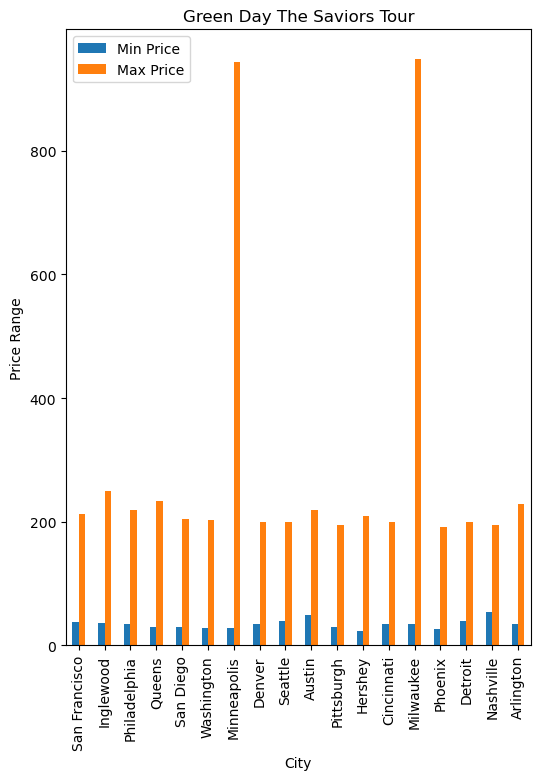

<Figure size 640x480 with 0 Axes>

In [38]:
# Create a bar chart 
max_chart = bar_gd_clean.plot(kind='bar', figsize=(6,8))

# Add labels
plt.xlabel('City')
plt.ylabel('Price Range')
plt.title('Green Day The Saviors Tour')

#bar_gd_clean.set_index("city", inplace=True)
plt.savefig("output_data/FigGD.png")

plt.show()
plt.tight_layout()